<a href="https://colab.research.google.com/github/MahmoodInamdar/Machine-learning-/blob/main/Google_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

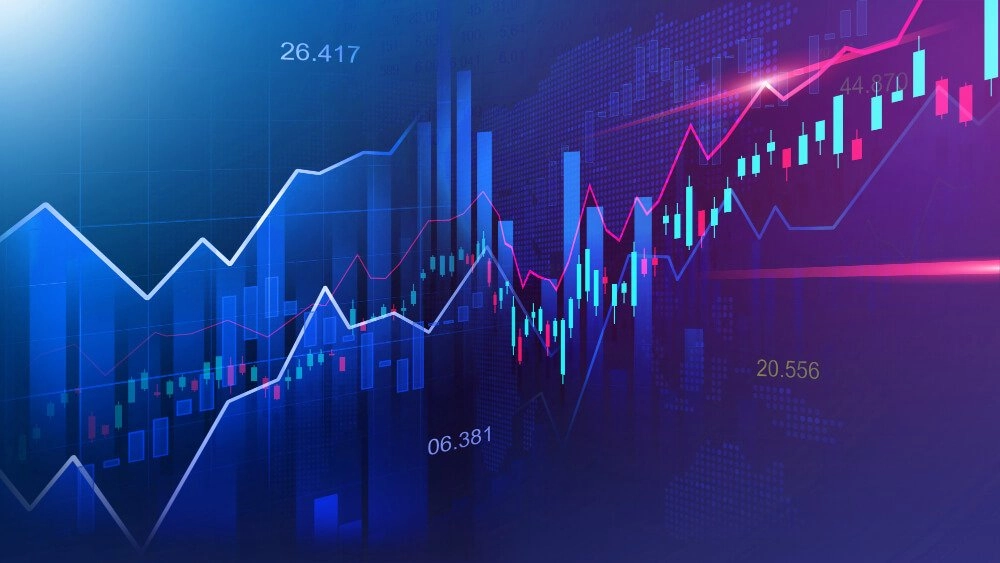

Mahmood Inamdar: GH1023619

This will be my final Assessment which will be submitted on canva.

I am going to predict google stock price using RNN and LSTM models and compare it with the actual stock price with a visualisation.

In the modern world, HFT ( high frequency trading ) is one of the important domain in banking sector. People with good knowledge builds algorithm which predict the companies future stock prices depending on the previous trend. The same way I have developed a model which will predict the stock prices for a better trading experience.

There are few things which can be considered here, Stock price can be manipulated by many factors depending on the news and trends and companies performance.

The Data which is used by me is Google stock prediction.

I have extracted the data set from yahoo finance.

finance.yahoo.com. (n.d.). Alphabet Inc. (GOOG) Stock Historical Prices & Data - Yahoo Finance. [online] Available at: https://finance.yahoo.com/quote/GOOG/history?period1=1653264000&period2=1687478400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true [Accessed 27 Jun. 2023].


I have extracted the max data from yahoo finance from 2004 till now. The data has more than 4000 entries and 7 coloumns.

The Data has different coloumns which are:
1. Date
2. Open (Opening price)
3. High (Highest Price)
4. Low (lowest Price)
5. Close (Closing Price)
6. Adv. Close
7. Volume

But we are more interested in date and open coloumn and we will move forward with them.

**1. Importing Libraries**

I have imported all the important libraries which are needed for my project.

The project is a deep learning algorithm of stock prediction of google stocks.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as graph
import warnings
warnings.filterwarnings("ignore")
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten


**2. Loading of the data**

In [ ]:
df = pd.read_csv("GOOG.csv")

In the below code block I have checked the lenght of my data and fixed a split ratio of 70% which is 70% to train and 30% to test.

so df_train will be lenght of data multipied to 70% and df_test will be remaining data which is 30%.



In [ ]:
len_df = len(df)
sr = 0.7
len_train = round(len_df * sr)
len_test = len_df - len_train
print("lenght of data :", len_df)
print("Traininig  :", len_train)
print("Test :", len_test)

lenght of data : 4743
Traininig  : 3320
Test : 1423


**3. Data Preprocessing**

We have selected only 2 coloumn that is date and Open with date time formating.


In [ ]:
df_train = df[:len_train].iloc[:,:2]
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train

,Date,Open
0,2004-08-19,2.490664
1,2004-08-20,2.515820
2,2004-08-23,2.758411
3,2004-08-24,2.770615
4,2004-08-25,2.614201
...,...,...
3315,2017-10-18,49.588501
3316,2017-10-19,49.299999
3317,2017-10-20,49.472000
3318,2017-10-23,49.476002


We have selected only 2 coloumn that is date and Open with date time formating.


In [ ]:
df_test = df[len_train:].iloc[:,:2]
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test


,Date,Open
3320,2017-10-25,48.418499
3321,2017-10-26,49.000000
3322,2017-10-27,50.459499
3323,2017-10-30,50.700001
3324,2017-10-31,50.761002
...,...,...
4738,2023-06-15,123.879997
4739,2023-06-16,126.699997
4740,2023-06-20,123.535004
4741,2023-06-21,123.235001


In [ ]:
df_train1 = df_train.Open.values
df_train1.shape

(3320,)

Reshaping the df_train set for our deep learning model.

In [ ]:
df_train1 = np.reshape(df_train1, (-1,1))
df_train1.shape

(3320, 1)

We have done a data preprocessing step to normalise the data, there are 2 ways to complete feature scaling :

1. Normalization
2. Standardization.

Usually in RNN we use normalization that is why I have used MinMaxScaler so that the values will be mapped to a specific range of (0s, 1s).


This helps to prevention of domination of features to each other.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
df_train1_scaled = scaler.fit_transform(df_train1)

df_train1_scaled.shape

(3320, 1)

x_train and y_train two empty data list are created to store the training dataset.

I have used time as 50 which is a hyper parameter which indicates the previous steps which will be used for the model to predict.

In [ ]:
x_train = []
y_train = []

time = 50

for i in range(time, len_train):
    x_train.append(df_train1_scaled[i-time:i,0])
    y_train.append(df_train1_scaled[i,0])

# convert list to array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
print("Checking the shape :",x_train.shape)
print("Checking the shape :",y_train.shape)

Checking the shape : (3270, 50)
Checking the shape : (3270,)


In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Checking the shape after reshape :",x_train.shape)
print("Checking the shape after reshape :",y_train.shape)

Checking the shape after reshape : (3270, 50, 1)
Checking the shape after reshape : (3270, 1)


**4. Modeling**

**Training the model**

We have used 3 different models to predict our data:

1. SimpleRNN model

Basically, simple RNN is a recurrent neural network which is used for sequence data analysis. This is a simple type of RNN layer that will process sequence data with hidden layers and output layer.

2. LSTM model

LSTM is a Long Short-Term Memory is a type of RNN model which is relaible for long-term relaibility of the sequential data.

3. GRU

Gated Recurrent unit also a type of RNN model which can be used for relaible long-term of sequential data.


**Model_RNN**:

The first model used my me is a RNN model where I have used four droupout layer and four RNN layers.

Multiple combinations by changing different activation function such as tanh, Relu, elu, sigmoid were tried to get a better result.

I even tried few combination with optimizers such as RMSprop and adam. But I had a good result with the combination used below.

Increasing the number of Epochs resulted in a better prediction and also, Adam as an optimiser was a better option to move forward.

I have selected loss function as mean_squared_error and metrics as accuracy.



In [ ]:
model_RNN = Sequential()


model_RNN.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (x_train.shape[1],1)))

model_RNN.add(Dropout(0.2))


model_RNN.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))

model_RNN.add(Dropout(0.2))

model_RNN.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))

model_RNN.add(Dropout(0.2))


model_RNN.add(SimpleRNN(units = 50))

model_RNN.add(Dropout(0.2))

model_RNN.add(Dense(units = 1))


model_RNN.compile(
    optimizer = "adam",
    loss = "mean_squared_error",
    metrics = ["accuracy"])


RNN = model_RNN.fit(x_train, y_train, epochs = 50, batch_size = 32)


Predicting the model with df_train dataset and scaling back from 0-1 to original

In [ ]:
y_pred_RNN = model_RNN.predict(x_train)
y_pred_RNN = scaler.inverse_transform(y_pred_RNN)
y_pred_RNN.shape

103/103 [==============================] - 2s 15ms/step


(3270, 1)

Rescaling the data from 0-1 to original for the prediction


In [ ]:
y_train = scaler.inverse_transform(y_train)
y_train.shape

(3270, 1)

Below there is a graphical representation of RNN model with df_train data set.

It can be observed that the model is following the patterns and trend in of the stock which is a positive sign moving forward.

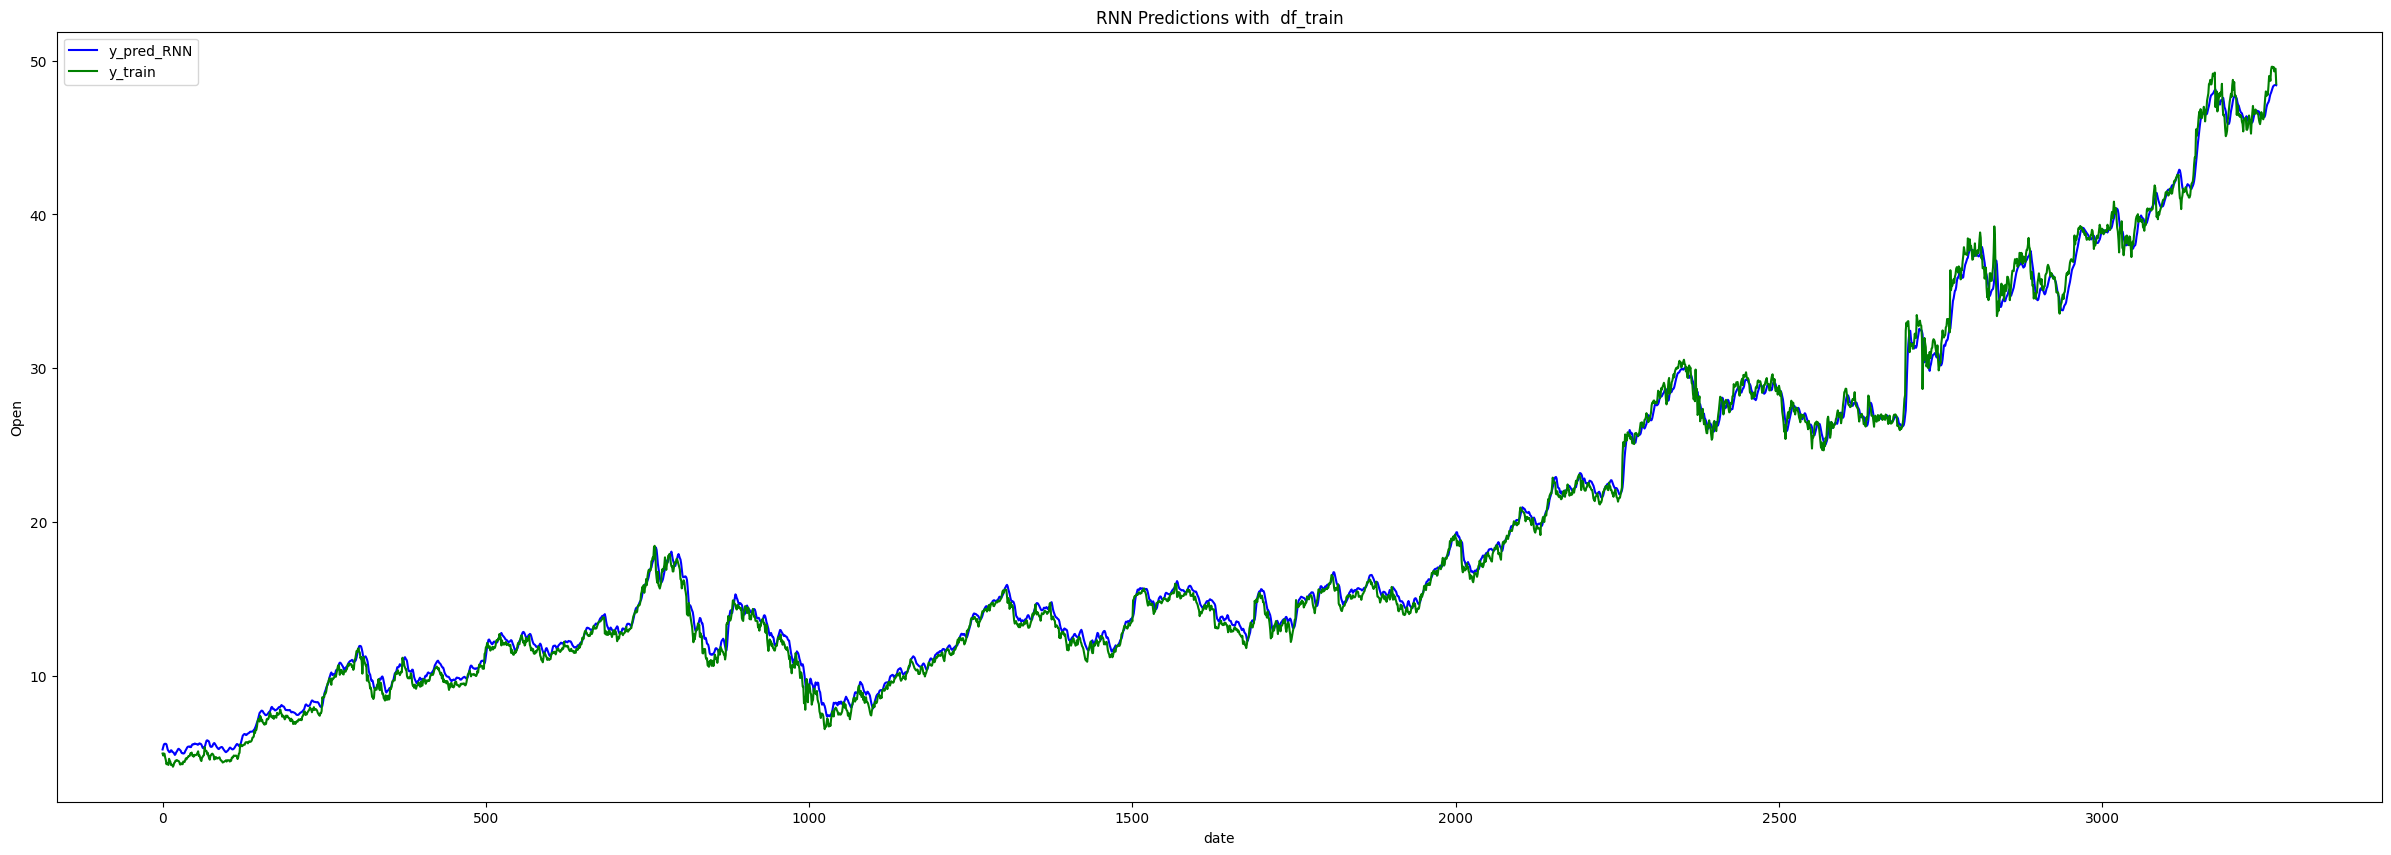

In [ ]:
graph.figure(figsize = (30,10))
graph.plot(y_pred_RNN, color = "b", label = "y_pred_RNN" )
graph.plot(y_train, color = "g", label = "y_train")
graph.xlabel("date")
graph.ylabel("Open")
graph.title("RNN Predictions with  df_train")
graph.legend()
graph.show()

Now we will select the Open coloumn of df_test and convert it to an array for further modelling.

We have converted 1D to 2D.

And also, I have scaled the open values to 0 and 1s.

In [ ]:
df_test1 = df_test.Open.values  # getting "open" column and converting to array
df_test1 = np.reshape(df_test1, (-1,1))  # converting 1D to 2D array
scaled_df_test1 =  scaler.fit_transform(df_test1)  # scaling open values to between 0 and 1
print("Shape of scaled_df_test1 :",scaled_df_test1.shape)

Shape of scaled_df_test1 : (1423, 1)


Creating a empty list of x_test and y_test from the df_test data set for testing our model.

In [ ]:
x_test = []
y_test = []

for i in range(time, len_test):
    x_test.append(scaled_df_test1[i-time:i,0])
    y_test.append(scaled_df_test1[i,0])

Converting the x_test and y_test to array and confirming the shape od the datasets.

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
print("Checking the shape :",x_test.shape)
print("Checking the shape :",y_test.shape)

Checking the shape : (1373, 50)
Checking the shape : (1373,)


Reshaping the dataset x_test to 3D array and y_test to 2D array.

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
y_test = np.reshape(y_test, (-1,1))

In [ ]:
print("Checking the shape after reshape :",x_test.shape)
print("Checking the shape after reshape :",y_test.shape)

Checking the shape after reshape : (1373, 50, 1)
Checking the shape after reshape : (1373, 1)


Below we have predicted using the x_test dataset and converted it to the original form for further process.

In [ ]:
y_pred_of_RNN = model_RNN.predict(x_test)

y_pred_of_RNN = scaler.inverse_transform(y_pred_of_RNN)
print("Shape of y_pred_of_RNN :",y_pred_of_RNN.shape)

43/43 [==============================] - 1s 15ms/step
Shape of y_pred_of_RNN : (1373, 1)


A graphical representation of the RNN model with the test data.

It can be observed that the RNN model is following the original data and also the patterns.

A few tuning might improve the performance of the model and also make it more accurate with the original data.

It is all about exploring more combinations and trying different values.



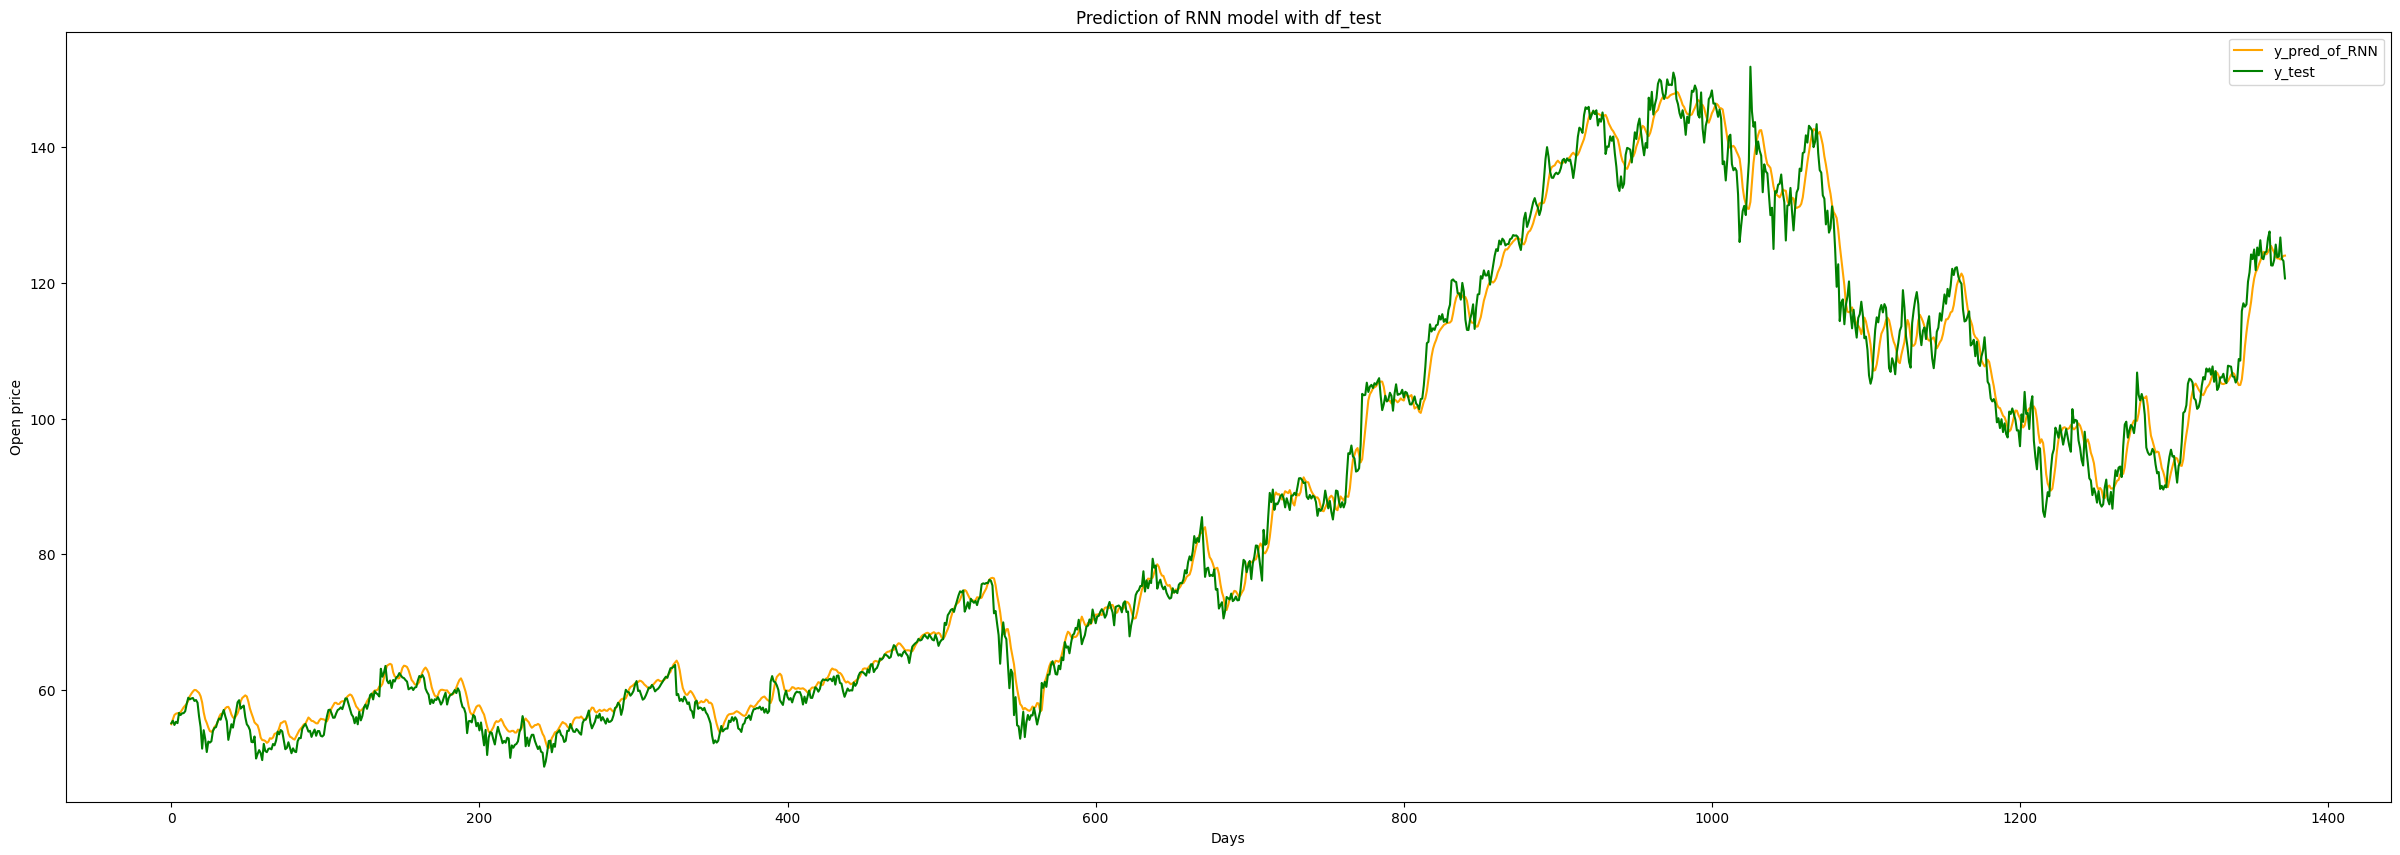

In [ ]:
graph.figure(figsize = (30,10))
graph.plot(y_pred_of_RNN, label = "y_pred_of_RNN", c = "orange")
graph.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
graph.xlabel("Days")
graph.ylabel("Open price")
graph.title("Prediction of RNN model with df_test")
graph.legend()
graph.show()

Below there is a visualisation of RNN model with df_train, df_test, y prediction with df_train dataset and y prediction with df_test dataset.

It can be observed that the model is following the trend and it can be used to predict the future price of the stock.

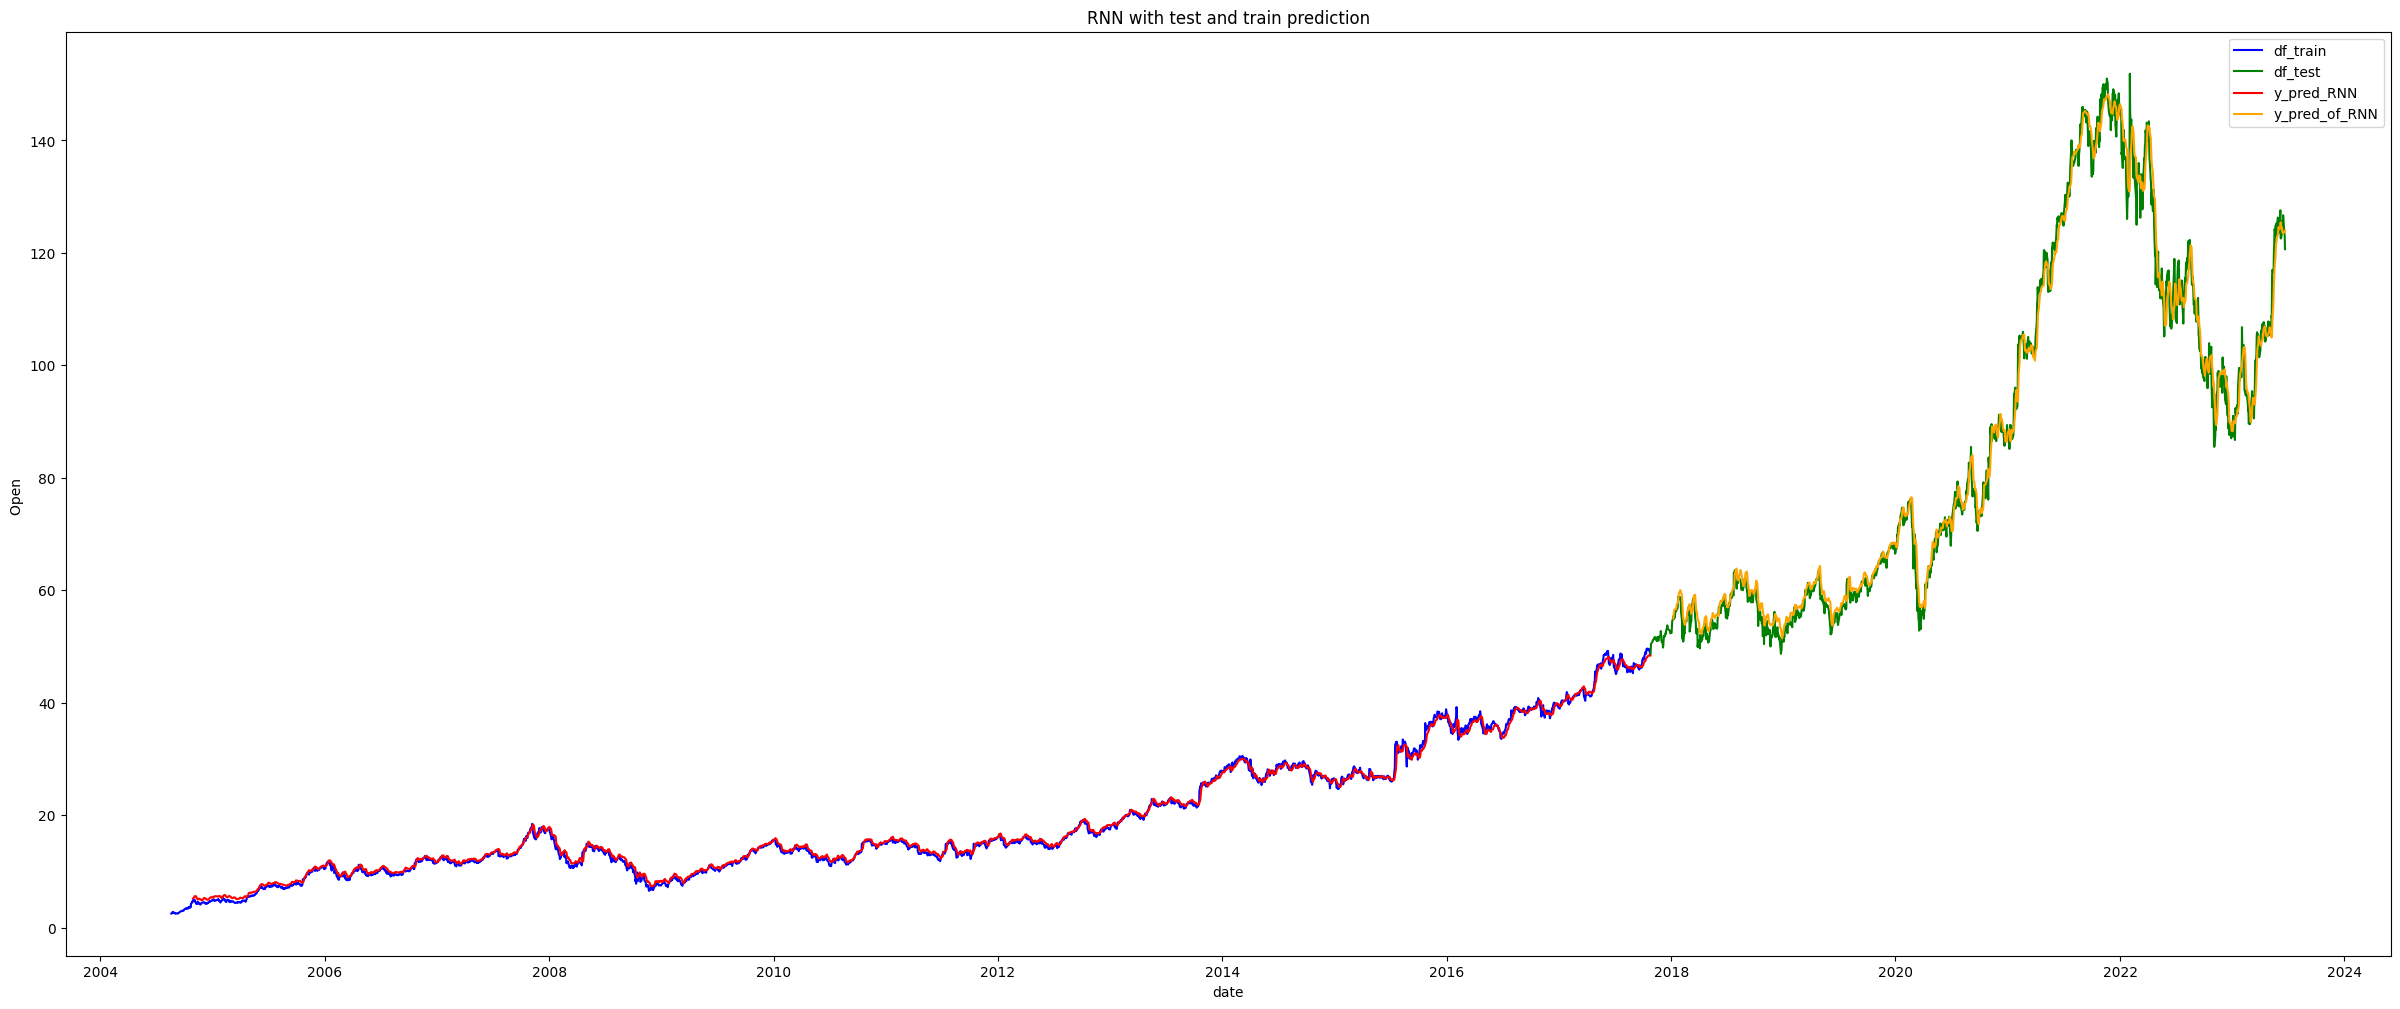

In [ ]:
graph.subplots(figsize =(30,12))
graph.plot(df_train.Date, df_train.Open, label = "df_train", color = "b")
graph.plot(df_test.Date, df_test.Open, label = "df_test", color = "g")
graph.plot(df_train.Date.iloc[time:], y_pred_RNN, label = "y_pred_RNN", color = "r")
graph.plot(df_test.Date.iloc[time:], y_pred_of_RNN, label = "y_pred_of_RNN", color = "orange")
graph.xlabel("date")
graph.ylabel("Open ")
graph.title("RNN with test and train prediction")
graph.legend()
graph.show()

**LSTM MODEL**

In LSTM model again I have used the same combination of 4 layers of LSTM and dropout with default activation function.

Relu was the second better option to go ahead with the model, but I had a better result with tanh. I started with 5 epochs and went all the way to 10 for a better prediction.

I tried different optimisers as RMSprop and Adam with different combination but in the end, the model had better prediction with adam.

I have selected loss function as mean_squared_error and metrics as accuracy.

I have selected 64 units of block of layers or memory layers for my modeling. It basically helps the model to memorise the patterns of the data and store it for more time.

In [ ]:
y_train = scaler.fit_transform(y_train)


In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(64,return_sequences=True,input_shape = (x_train.shape[1],1)))
model_lstm.add(LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
LSTM = model_lstm.fit(x_train, y_train, epochs = 10, batch_size = 10)

A graphical representation of the LSTM model with the test data.

It can be observed that the RNN model is following the original data and also the patterns but is laging at some points which can be accurated by some tuning in the model.

A few tuning might improve the performance of the model and also make it more accurate with the original data.



43/43 [==============================] - 1s 21ms/step


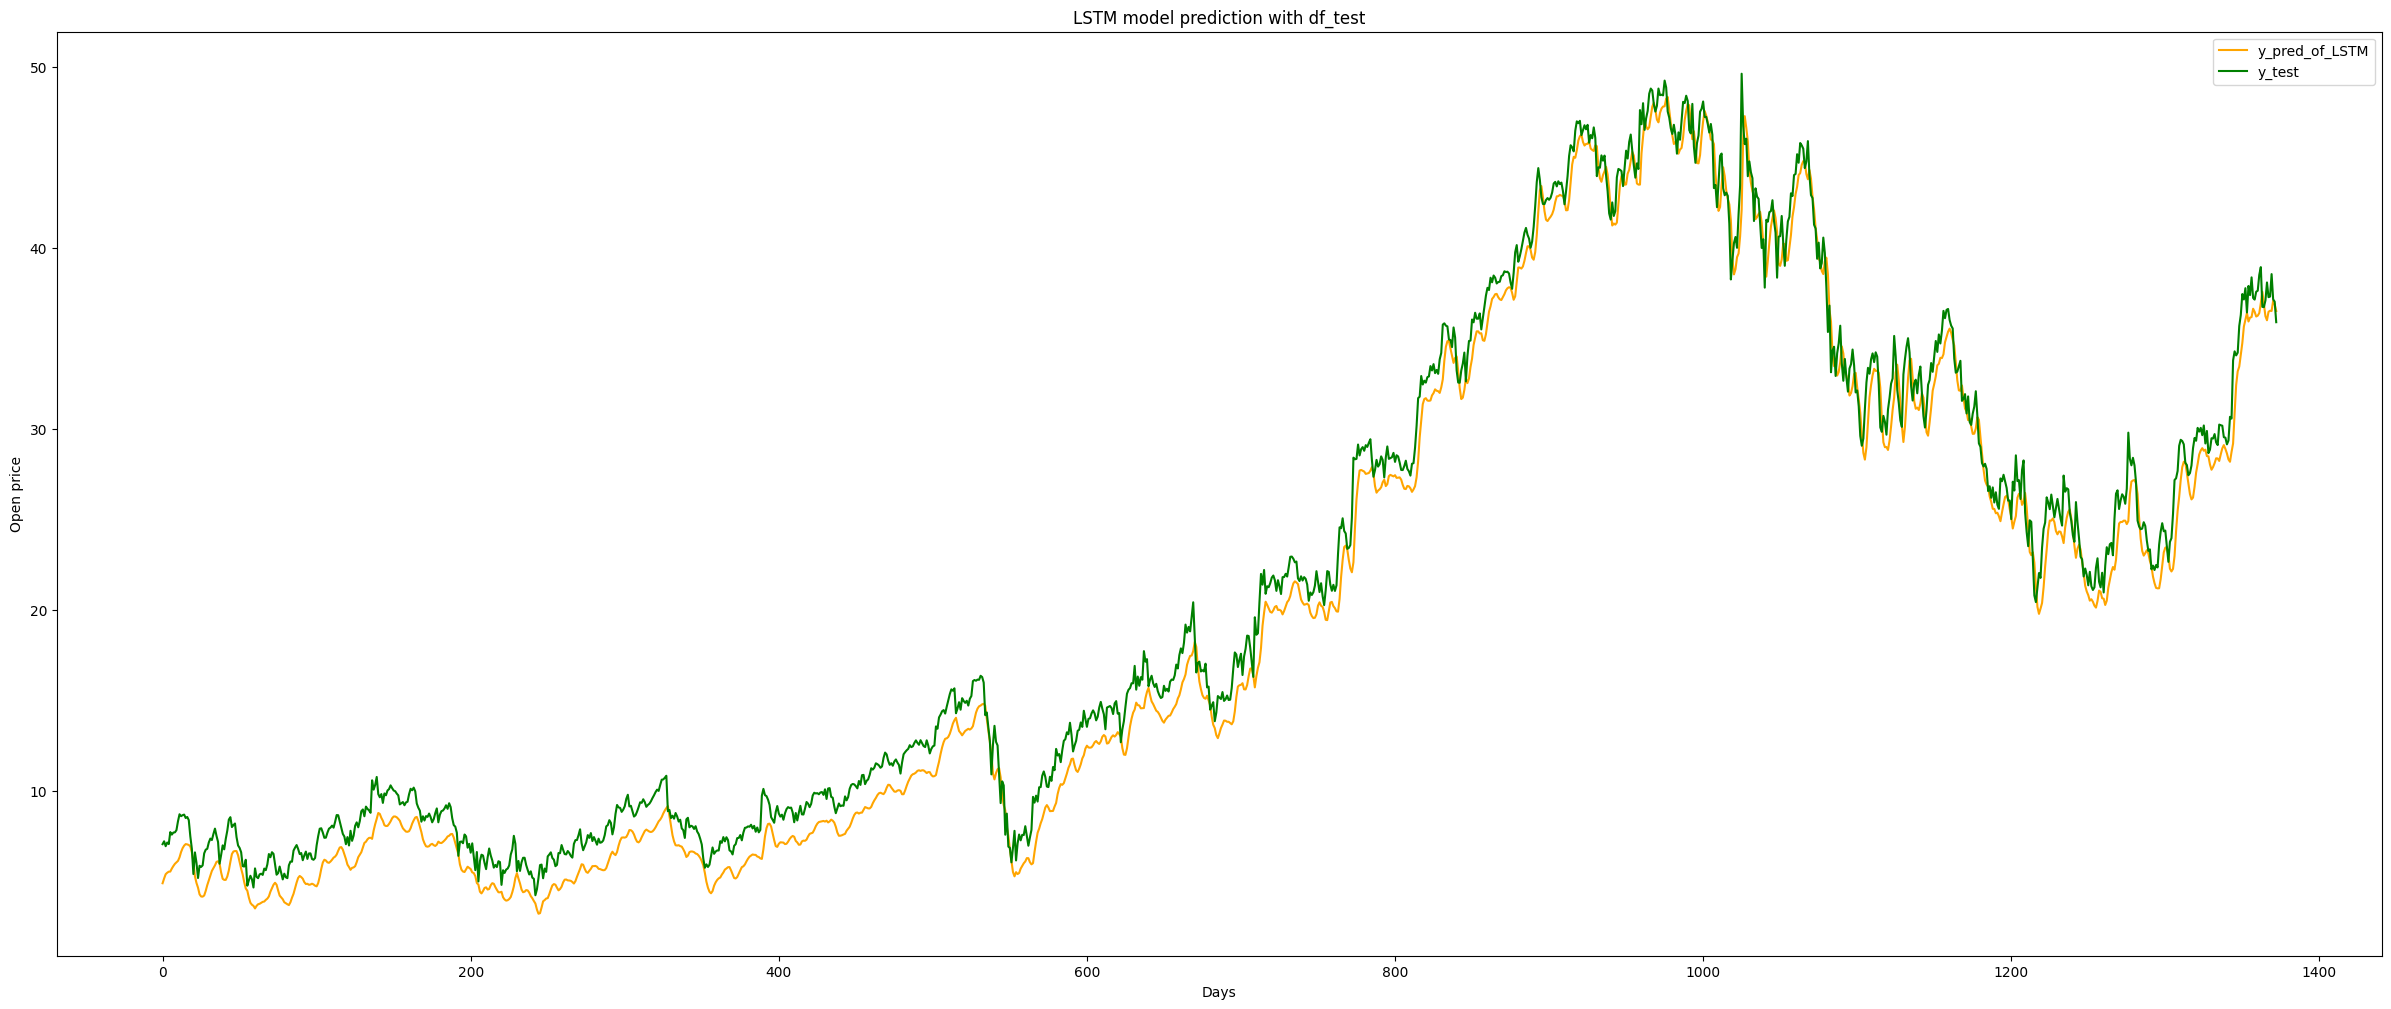

In [ ]:
graph.subplots(figsize =(30,12))
graph.plot(scaler.inverse_transform(model_lstm.predict(x_test)), label = "y_pred_of_LSTM", c = "orange" )
graph.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
graph.xlabel("Days")
graph.ylabel("Open price")
graph.title("LSTM model prediction with df_test")
graph.legend()
graph.show()

**Model_GRU**

In GRU model, I tried a different combination of Conv1D, Maxpooling, Flatten and dropout layers.

Different combinations of activation functions were used such as tanh, relu, elu and sigmoid.

I have selected loss function as mean_squared_error and metrics as accuracy.

I started with 5 epochs and went all the way upto 10 epochs which gave me a better result and accuracy.


In [ ]:
y_train = scaler.fit_transform(y_train)


In [ ]:
model_GRU = Sequential()
model_GRU.add(GRU(units=50, return_sequences=True,input_shape = (x_train.shape[1],1)))
model_GRU.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_GRU.add(MaxPooling1D(pool_size=2))
model_GRU.add(Flatten())
model_GRU.add(Dense(units=64, activation='relu'))
model_GRU.add(Dropout(0.2))
model_GRU.add(Dense(units=1))
model_GRU.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
model_GRU.fit(x_train, y_train, batch_size=32, epochs=10)

A graphical representation of the GRU model with the test data.

It can be observed that the RNN model is following the original data and also the patterns but is way behind at some points which can be accurated by some tuning in the model.

A few tuning might improve the performance of the model and also make it more accurate with the original data.

It can be said that all the model are performing good and are relaible for future use.

43/43 [==============================] - 1s 12ms/step


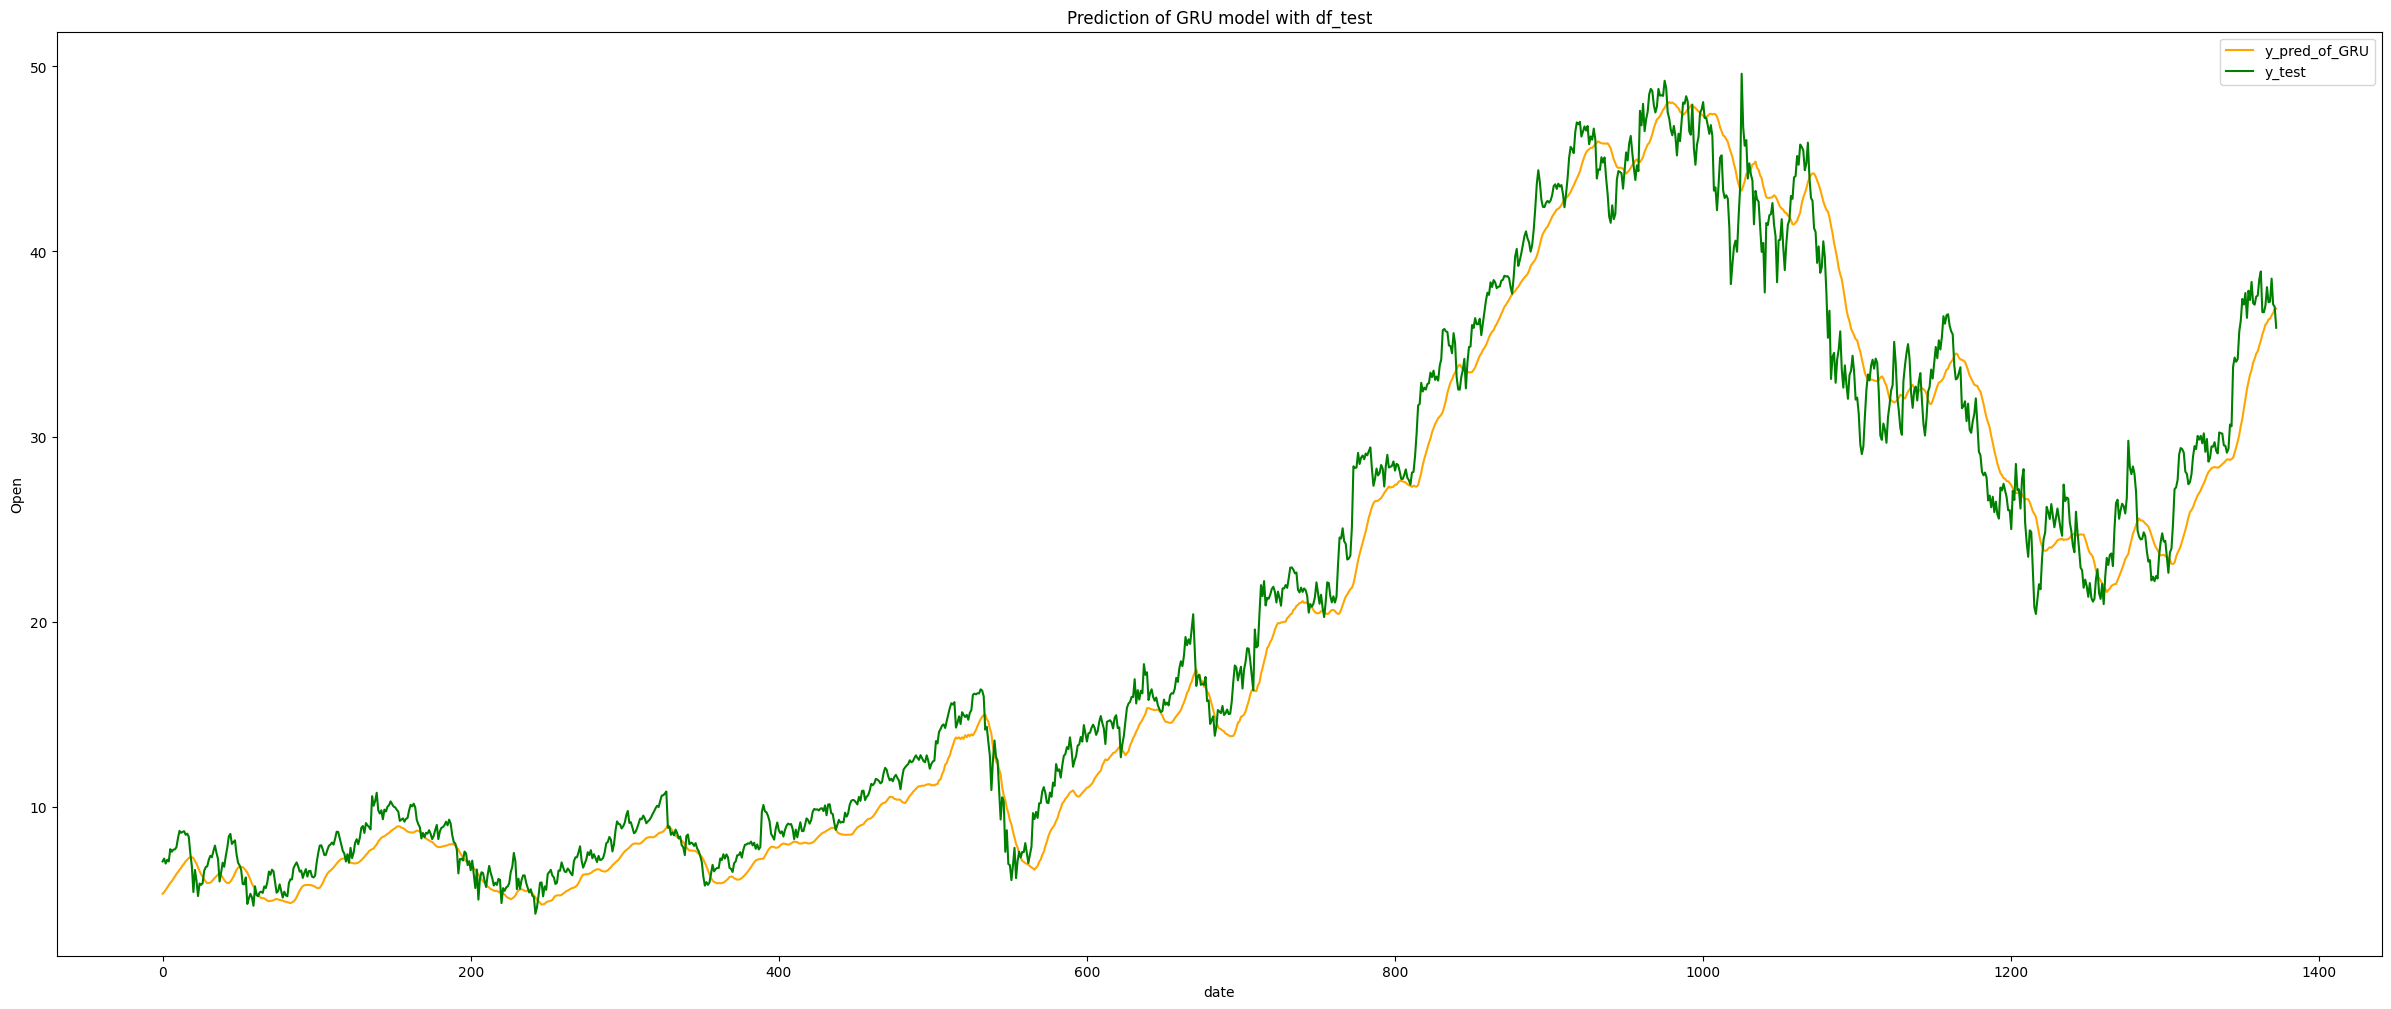

In [ ]:
graph.subplots(figsize =(30,12))
graph.plot(scaler.inverse_transform(model_GRU.predict(x_test)), label = "y_pred_of_GRU", c = "orange" )
graph.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
graph.xlabel("date")
graph.ylabel("Open")
graph.title("Prediction of GRU model with df_test")
graph.legend()
graph.show()

**5. Comparing the Stock Price.**

Below I have checked the last data in my dataset which is 22nd June, 2023.

In [ ]:
df.iloc[-1]


Date         2023-06-22
Open         120.660004
High         123.934998
Low          119.599998
Close        123.870003
Adj Close    123.870003
Volume         20781900
Name: 4742, dtype: object

X_future is a new variable in which I have selected last 50 rows and they are converted to array.

After that we have converted the data to 2D array and scaled them.

Then we reshaped the data to 3D array for testing and prediction through our model.

In [ ]:
X_future = df.iloc[-time:].Open.values
X_future = scaler.fit_transform(X_future.reshape(-1,1))
X_future = np.reshape(X_future, (1,50,1))
print("Shape of X_future :", X_future.shape)
X_future

Shape of X_future : (1, 50, 1)


array([[[0.13591622],
        [0.09653274],
        [0.14875881],
        [0.05201216],
        [0.11922106],
        [0.        ],
        [0.01862183],
        [0.08026541],
        [0.07855338],
        [0.10252589],
        [0.05757714],
        [0.04345064],
        [0.15346776],
        [0.15004302],
        [0.14747465],
        [0.08583069],
        [0.08326233],
        [0.04730325],
        [0.06763707],
        [0.19541964],
        [0.18557392],
        [0.49850191],
        [0.54730323],
        [0.52547095],
        [0.54002592],
        [0.68343336],
        [0.74250862],
        [0.85552227],
        [0.82598481],
        [0.88677239],
        [0.7562072 ],
        [0.89875865],
        [0.84974337],
        [0.94499161],
        [0.83411816],
        [0.82555664],
        [0.86793669],
        [0.87307381],
        [0.95826203],
        [1.        ],
        [0.78638708],
        [0.78531683],
        [0.82106165],
        [0.9175944 ],
        [0.83839924],
        [0

As mentioned below, I have predicted the Open price of the google stock of 23nd June, 2023 which is not in our data set through our model.



In [ ]:
RNN_prediction = scaler.inverse_transform(model_RNN.predict(X_future))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_future))
GRU_prediction = scaler.inverse_transform(model_GRU.predict(X_future))

print("Model RNN prediction for 23rd June, 2023  :", RNN_prediction[0,0])
print("Model LSTM prediction for 23rd June, 2023 :", LSTM_prediction[0,0])
print("Model GRU prediction for 23rd June, 2023  :", GRU_prediction[0,0])


1/1 [==============================] - 0s 24ms/step
Model RNN prediction for 23rd June, 2023  : 123.96106
Model LSTM prediction for 23rd June, 2023 : 121.71131
Model GRU prediction for 23rd June, 2023  : 122.48722


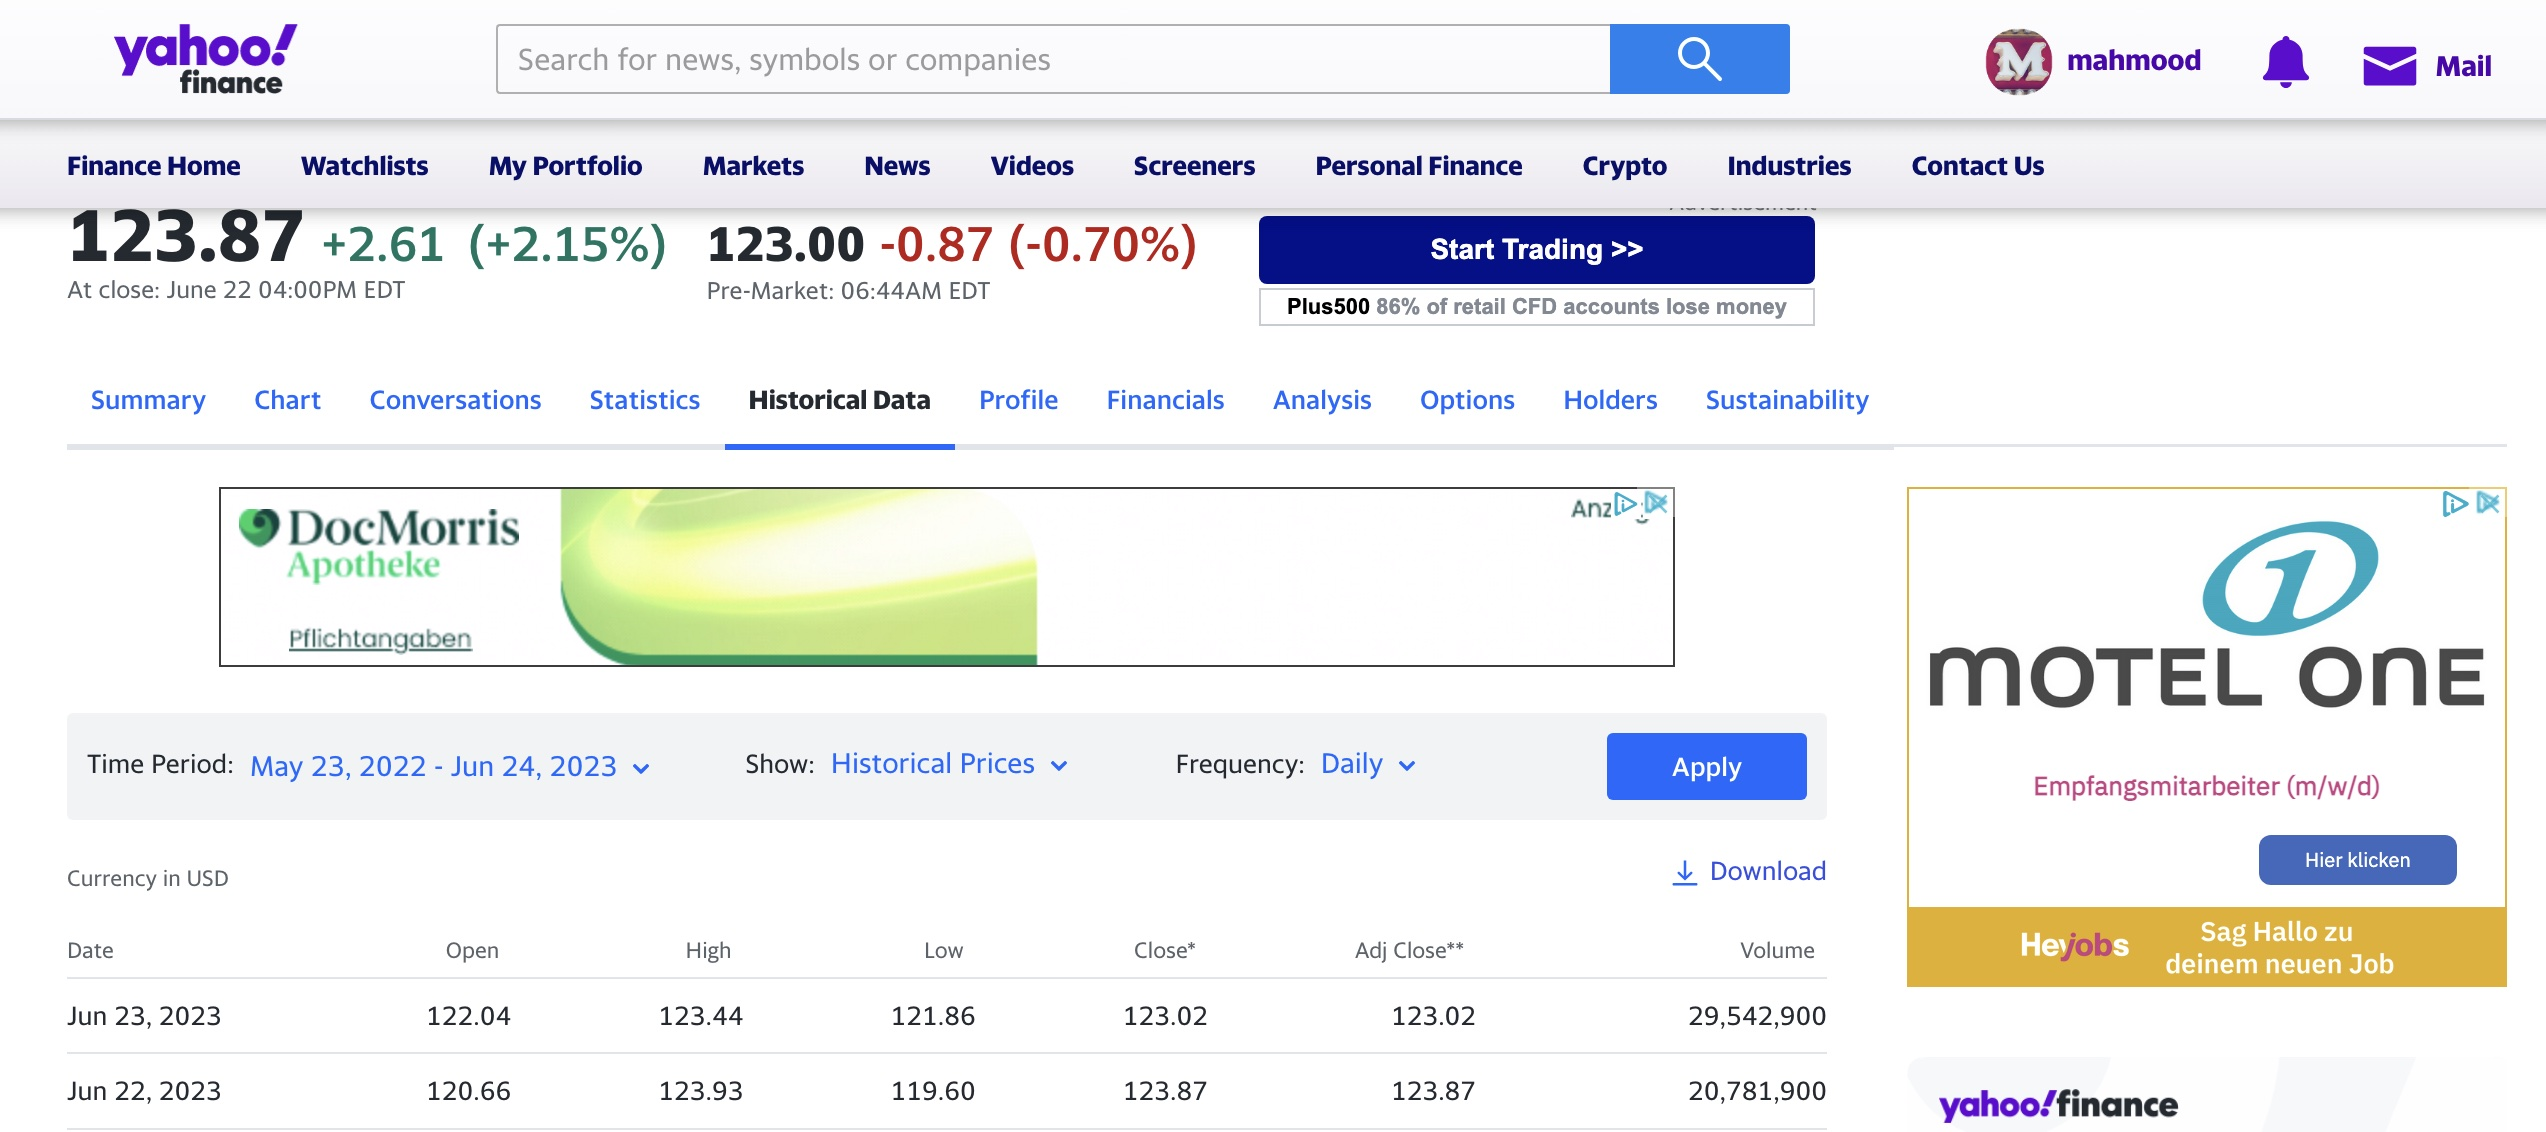

AS it can seen above that all the models are performing well,

Observations:

RNN model predicted 123.9 which was close to 122.04
LSTM predicted 121.7 which was again very close
GRU predicted 122.40 which was close but not the closes.

In conclusion I can confirm that LSTM model is performing very accurately and can be the most reliable option from the above 3.

As it can be observed as the predicted score of LSTM model was a better option for the future use as it predicted the closest price from the original data. It can be observed from the above graph that the models are following the trend but are not 100% accurate in predicting the stock price. More model tuning can be done with alot different combonation for a better result and accuracy.


At times, GRU model is under predicting the data and LSTM model is following the trend of the data.

This model can be used for safe stock trading and can be a very convenient option as well as a relaible option.

All the multinational banks use this kind of model for day to day basis trading which can benefit alot to the customer and the bank employess.

**Learning - **

I have learned alot from the above project. Deep learning is always a better option for modeling purposes and at time machine learning algorithms can out perform them. Different combinations of epochs, activation functions, optimisers and different parameters can change the models performance to a very great extend. I tried many options and was playing around with different combination but at the end I went with the above combionation which performed better and the results were as per the expectation.

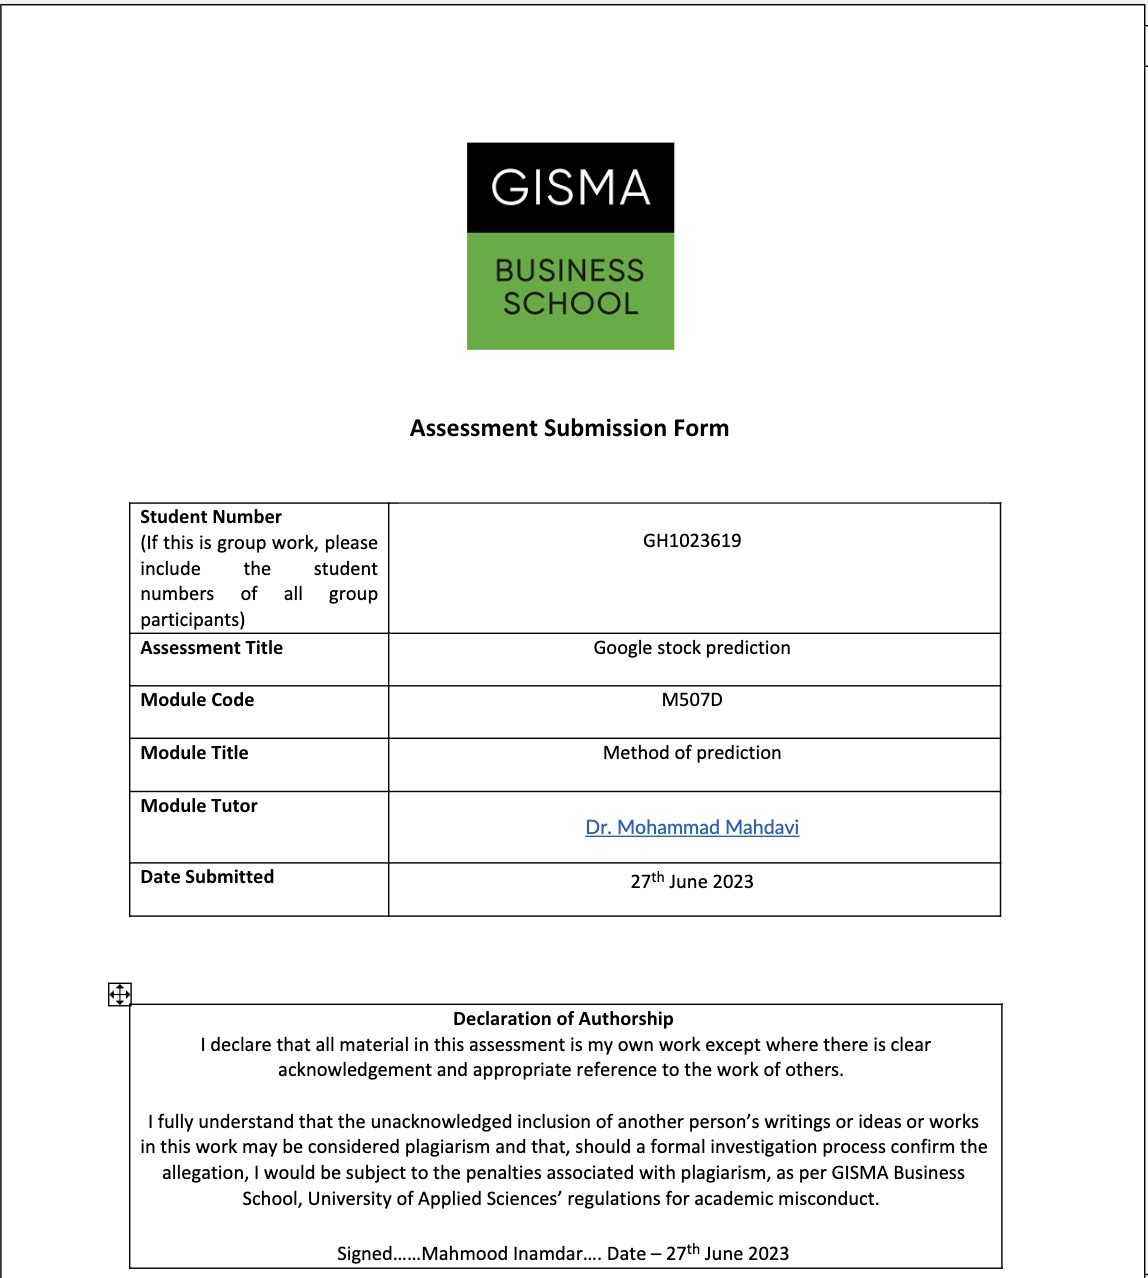